## Assignment 3

### Abhijith Ravikumar Puthussery

### Write a TensorFlow Program: Classification

#### Translate the following program to TensorFlow using your elab Cloud Jupyter Notebook (https://github.com/ml6973/Course/blob/master/code/Introduction%20to%20Deep%20Learning.ipynb)

#### Data : Data is taken from sklearn's make_moon dataset. There are two features and and the target is a categorical variable (0/1). The aim is to devise an algorithm that correctly classifies the datapoints. Here is the link to the data set: (https://github.com/ml6973/Course/blob/master/code/data/intro_to_ann.csv)

In [52]:
#Import the required packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string

In [53]:
epochs = 10000 #No of iterations
learning_rate = 0.01 #Rate of learning

In [54]:
random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(500, 2) (500, 1)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


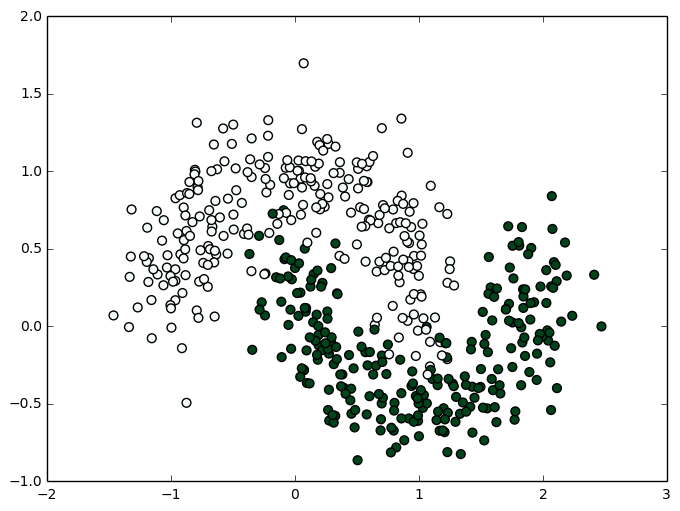

In [55]:
training = pd.read_csv("intro_to_ann.csv") #Read dataset
print (training.head())
mti, mtl = np.array(training.ix[:,0:2]), np.array(training.ix[:,2:3]) #mti=image, mtl=layer
plt.scatter(mti[:,0], mti[:,1], s=40, c=mtl, cmap=plt.cm.BuGn) #Scatter plot
print(mti.shape, mtl.shape) #dimension of mti & mtl

In [56]:
x = tf.placeholder(tf.float32, [None, 2])
Wh = tf.Variable(tf.random_normal([2, 6])) #Weight of hidden layer
W = tf.Variable(tf.random_normal([2,6])) #Normal weight
bh = tf.Variable(tf.random_normal([6])) #Bias of hidden layer
b = tf.Variable(tf.zeros([1])) #Bias of layer
y = tf.nn.softmax(tf.add(tf.matmul(x, W) , b)) #Output
y_= tf.placeholder(tf.float32,[None,1])

In [57]:
# Define loss and optimizer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [58]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [59]:
#Creating and running the session for accuracy
init = tf.initialize_all_variables()
errors=[]
with tf.Session() as sess:
        sess.run(init)
        for i in range(epochs):
            batch_xs = mti
            batch_ys = mtl
            _, cross_entropy_value, y_value = sess.run([optimizer, cross_entropy, y], feed_dict={x: batch_xs, y_: batch_ys})
            accuracy_value = sess.run(accuracy, feed_dict={x: mti, y_: mtl})
            errors.append(1-accuracy_value)
        print (accuracy_value)
        

0.688


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


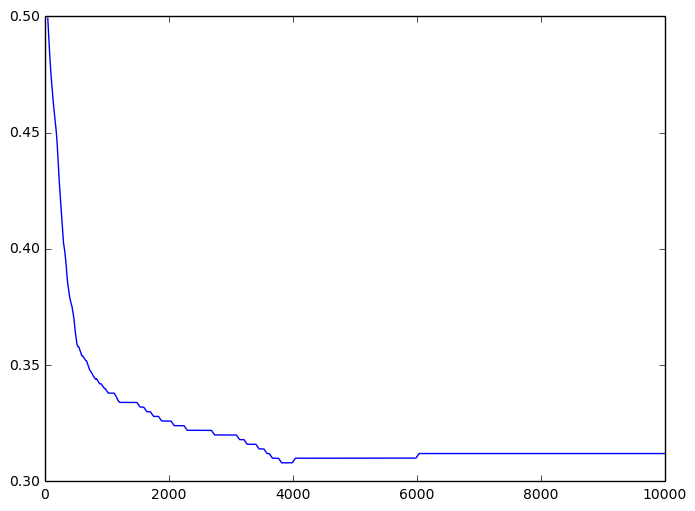

In [60]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()